In [1]:
import numpy as np
import pandas as pd

In [2]:
#load data
file=pd.read_csv('adult_train.csv')

In [3]:
#get 5 rows
file.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [4]:
#we have 41 features and dont know what is usefull for us. feature selection is only option so, i used wrapper method 
#use OLS algorithm in gretl 
X=file.iloc[:,[0,4,5,6,7,8,10,11,13,14,15,19,21,22,-1]]
X.shape

(199523, 15)

In [5]:
#this is imbalanced data we need to drop duplicate rows so it'll be better 
X.drop_duplicates(inplace=True)
X.shape

C:\Users\sj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(107722, 15)

In [6]:
#check na values in each columns
X.isna().sum()

age                                0
education                          0
wage_per_hour                      0
enrolled_in_edu_inst_lastwk        0
marital_status                     0
major_industry_code                0
race                               0
hispanic_origin                  780
member_of_labor_union              0
reason_for_unemployment            0
full_parttime_employment_stat      0
tax_filer_status                   0
state_of_previous_residence      584
d_household_family_stat            0
income_level                       0
dtype: int64

In [9]:
#fill drop values in rows
X.fillna(value=0,axis=1)
X.shape
#check na values are fill with 0 or not 
X.isna().sum()

age                                0
education                          0
wage_per_hour                      0
enrolled_in_edu_inst_lastwk        0
marital_status                     0
major_industry_code                0
race                               0
hispanic_origin                  780
member_of_labor_union              0
reason_for_unemployment            0
full_parttime_employment_stat      0
tax_filer_status                   0
state_of_previous_residence      584
d_household_family_stat            0
income_level                       0
dtype: int64

In [10]:
#drop is the only option
X.dropna(axis=1,inplace=True)


C:\Users\sj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107722 entries, 0 to 199522
Data columns (total 13 columns):
age                              107722 non-null int64
education                        107722 non-null object
wage_per_hour                    107722 non-null int64
enrolled_in_edu_inst_lastwk      107722 non-null object
marital_status                   107722 non-null object
major_industry_code              107722 non-null object
race                             107722 non-null object
member_of_labor_union            107722 non-null object
reason_for_unemployment          107722 non-null object
full_parttime_employment_stat    107722 non-null object
tax_filer_status                 107722 non-null object
d_household_family_stat          107722 non-null object
income_level                     107722 non-null int64
dtypes: int64(3), object(10)
memory usage: 11.5+ MB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


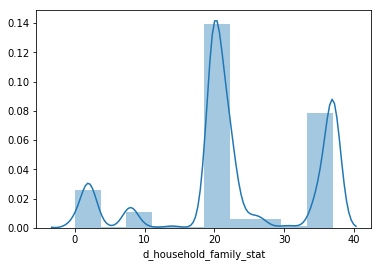

In [31]:
#create bin graph
sns.distplot(X['d_household_family_stat'].dropna(),bins=10)

<BarContainer object of 107722 artists>

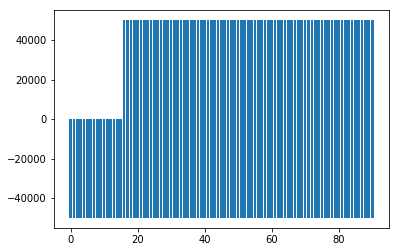

In [13]:
#plot a bar graph between age and income level
plt.bar(X['age'],X['income_level'])

In [ ]:
#plot a bar graph
plt.figure(figsize=(15,15))
plt.bar(X['tax_filer_status'],X['income_level'],bottom=2)

<BarContainer object of 107722 artists>

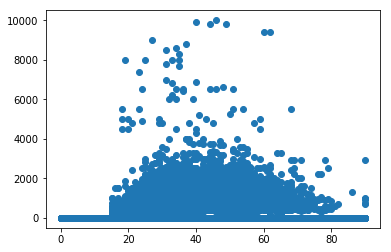

In [14]:
#scatter graph help to find data is linear or non linear
plt.scatter(X['age'],X['wage_per_hour'])

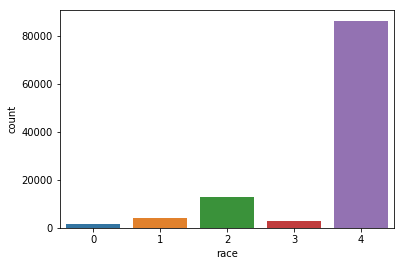

In [18]:
sns.countplot(X['race'])

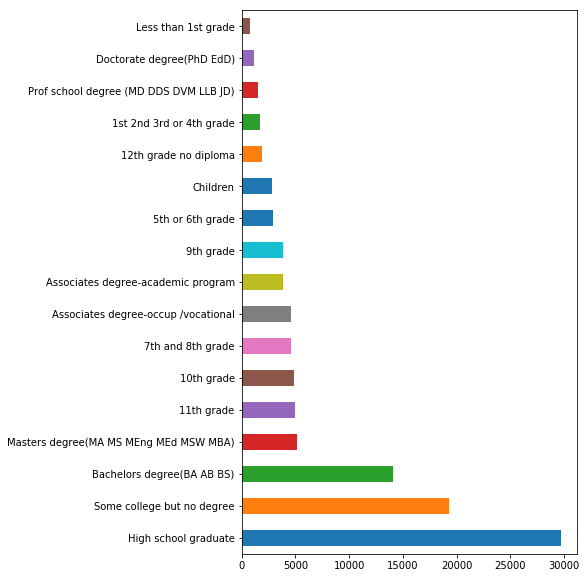

In [30]:
import matplotlib.pyplot as plt
X['education'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

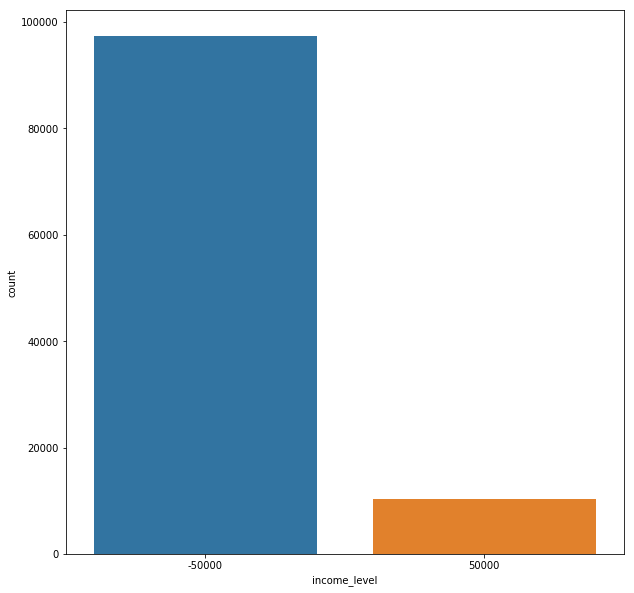

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(X['income_level'])



C:\Users\sj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


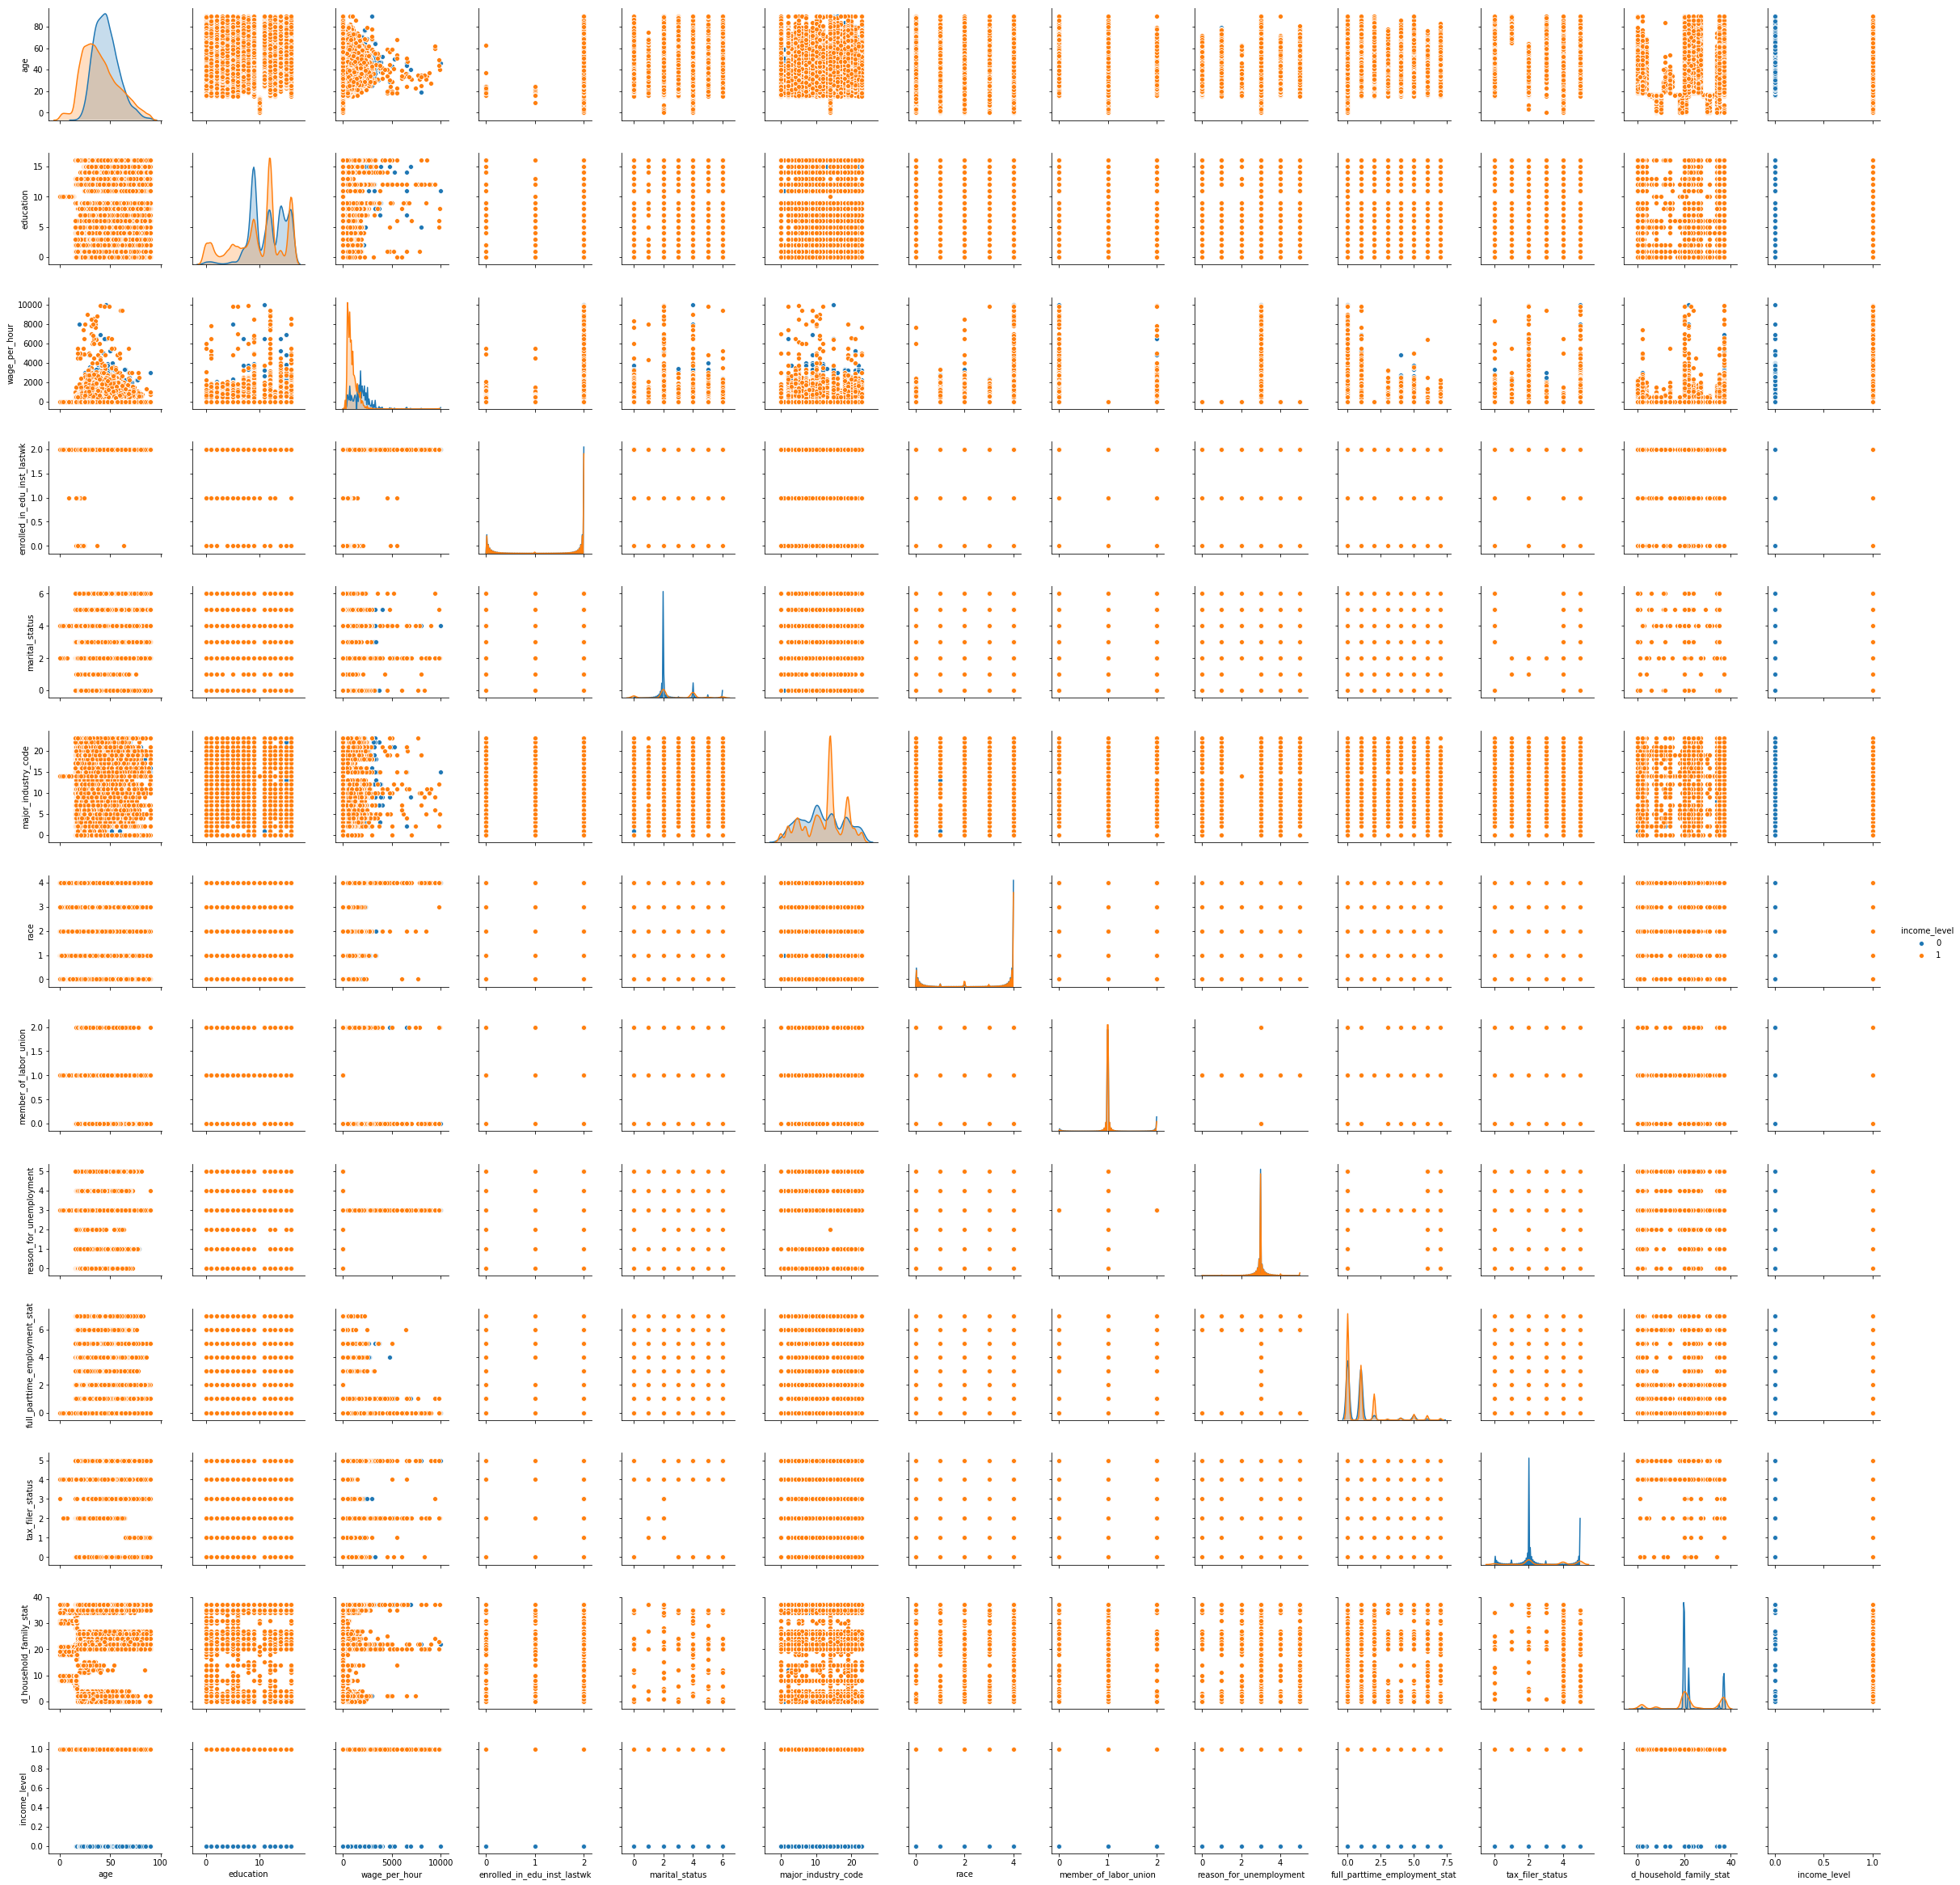

In [27]:
#change target value in to 0 and 1 and create a paitplot of predicted variable with predectors 
X['income_level']=pd.get_dummies(X['income_level'])
sns.pairplot(X,hue='income_level')

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#convert obejct tye features into int using labelEncoder
labelencoder=LabelEncoder()

In [ ]:
features=['education','enrolled_in_edu_inst_lastwk','marital_status','major_industry_code','race'
          ,
            'member_of_labor_union',
            'reason_for_unemployment',  
    'full_parttime_employment_stat',
    'tax_filer_status',
    'd_household_family_stat']
for i in features:
    X[i]=labelencoder.fit_transform(X[i])

In [ ]:
X['income_level']=pd.get_dummies(X['income_level'])
X['income_level']

In [ ]:
X

In [17]:
Y=X.iloc[:,-1]
Y.shape

(107722,)

In [18]:
X=X.drop(labels=['income_level'],axis=1)
X

,age,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,race,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,tax_filer_status,d_household_family_stat
0,73,12,0,2,6,14,4,1,3,2,4,24
1,58,16,0,2,0,4,4,1,3,0,0,20
2,18,0,0,1,4,14,1,1,3,2,4,2
3,9,10,0,2,4,14,4,1,3,0,4,8
4,10,10,0,2,4,14,4,1,3,0,4,8
5,48,16,1200,2,2,6,0,0,3,1,2,37
6,42,9,0,2,2,7,4,1,3,0,2,20
7,28,12,0,2,4,4,4,1,1,6,5,35
8,47,16,876,2,2,5,4,0,3,1,2,37
9,34,16,0,2,2,4,4,1,3,0,2,20


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#sns.scatterplot(x=X['education'],y=Y)
plt.scatter(X['education'],Y)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [36]:
x_train.drop_duplicates()
x_test.drop_duplicates()

,age,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,race,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,tax_filer_status,d_household_family_stat
145273,38,12,0,2,2,4,4,1,3,0,2,20
27275,45,16,1550,2,2,10,4,2,3,1,2,20
187097,59,12,0,2,2,12,4,1,3,1,2,20
28361,83,16,0,2,4,14,4,1,3,0,5,22
71009,69,9,0,2,2,14,4,1,3,0,1,37
4594,27,12,0,2,2,22,4,1,3,2,2,20
123502,46,16,0,2,2,8,4,1,3,5,2,20
91113,34,8,0,2,2,19,4,1,3,0,2,20
146708,60,4,0,2,2,14,4,1,3,2,4,37
100738,28,9,0,2,5,7,4,1,3,1,5,0


In [37]:
x_train.shape

(72173, 12)

In [38]:
x_test.shape

(35549, 12)

In [39]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)
nv.predict(x_test)
nv.score(x_test,y_test)

0.6528453683647922

In [41]:
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9038228923457763

In [42]:
y_true=lr.predict(x_test)

In [82]:
y_true

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [83]:
y_test

15879     1
73422     1
93072     1
68373     1
88648     1
156595    1
80932     1
107998    1
60624     1
130063    1
63242     1
176588    1
164176    1
64682     1
147981    1
38649     1
114183    1
170277    0
45865     0
85965     1
29935     1
111274    1
37388     1
186475    1
40676     1
194028    1
40497     1
24898     1
98051     1
61196     1
         ..
84196     1
43562     1
40672     1
176065    1
123632    1
111169    1
8426      1
80668     0
155148    1
14585     0
47809     1
104503    1
95802     1
16258     1
57891     1
100276    1
178587    1
44839     1
26576     1
115919    1
159323    1
72239     1
190378    1
186715    1
184059    1
11062     1
80810     1
43245     1
75476     1
122964    1
Name: income_level, Length: 75406, dtype: uint8

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
accuracy_score(y_true,y_test)

0.9038228923457763

In [ ]:
for i in y_test:
    for j in y_train:
        if i==j:
            print (l=[i,j])
        

In [45]:
confusion_matrix(y_test,y_true)


array([[    0,  3419],
       [    0, 32130]], dtype=int64)

In [46]:
from sklearn.cross_validation import cross_val_predict,cross_val_score,KFold

C:\Users\sj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
KFold(n=5,n_folds=3,shuffle=True)

sklearn.cross_validation.KFold(n=5, n_folds=3, shuffle=True, random_state=None)

In [48]:
scores=cross_val_score(lr,x_train,y_train,cv=5,scoring='f1_macro')
scores

C:\Users\sj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sj\Anaconda3\lib\site-packages\sklearn\metrics\classification.p

array([0.47467249, 0.47468976, 0.47468792, 0.47468792, 0.47468792])

In [49]:
scores.mean()

0.4746852029188526

In [52]:
scores.std()

6.396835780130249e-06

In [54]:
from sklearn.externals import joblib

In [55]:
joblib.dump(lr , 'model.pk1')

['model.pk1']